In [1]:
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [4]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.0e-20,1.0e-16)
    slc.show()

For the FACTOR = 100 sphere, core formation seemed to happen at t = 9.60E+11 s. So we want to introduce a sink particle at that time. 

In [38]:
FAT_FACTOR = 100
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_0000".format(FAT_FACTOR))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density is : ", rho

G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
jeans_length = sqrt(pi*c_s**2/(G*rho))
boxlen =1e19
lev_max = 5
cell_size = boxlen/(2**(lev_max+2))
rho_threshold = pi*c_s**2/(4*G*jeans_length**2)
r_acc = 2.5*cell_size
rho_threshold=  pi*c_s**2/(4*G*r_acc**2)
print "sink_density_thresh = ", rho_threshold
print "sink_accretion_radius = ", r_acc
print "sink_softening_radius = ", r_acc

central density is :  1.0145485398e-17
sink_density_thresh =  2.54794669312e-19
sink_accretion_radius =  1.953125e+17
sink_softening_radius =  1.953125e+17


In [5]:
ls sod*

sod.dat            sod_hdf5_part_0000     sod_hdf5_plt_cnt_0001
sod_hdf5_chk_0000  sod_hdf5_part_0001     sod_hdf5_plt_cnt_0002
sod_hdf5_chk_0001  sod_hdf5_part_0002     sod_hdf5_plt_cnt_0003
sod_hdf5_chk_0002  sod_hdf5_part_0003     sod_hdf5_plt_cnt_0004
sod_hdf5_chk_0003  sod_hdf5_part_0004     sod_hdf5_plt_cnt_0005
sod_hdf5_chk_0004  sod_hdf5_part_0005     sod_hdf5_plt_cnt_0006
sod_hdf5_chk_0005  sod_hdf5_part_0006     sod_hdf5_plt_cnt_0007
sod_hdf5_chk_0006  sod_hdf5_part_0007     sod_hdf5_plt_cnt_0008
sod_hdf5_chk_0007  sod_hdf5_part_0008     sod.log
sod_hdf5_chk_0008  sod_hdf5_plt_cnt_0000



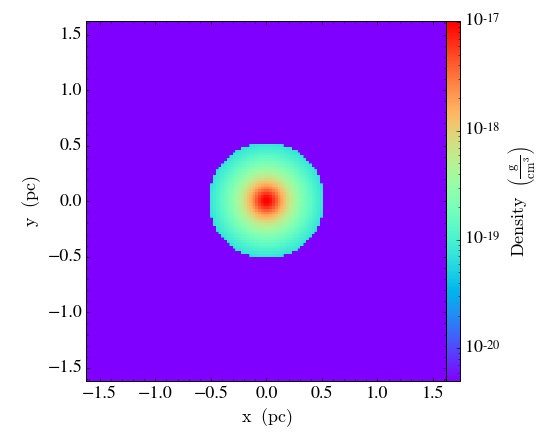


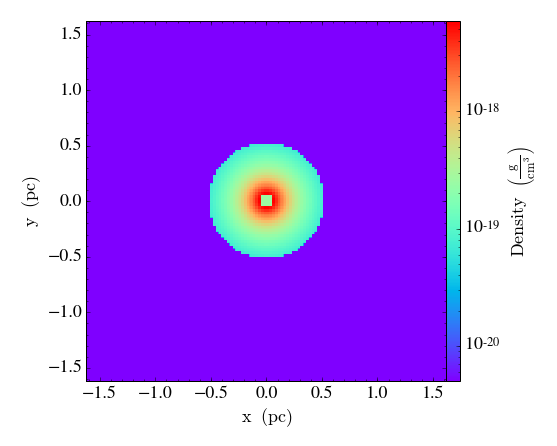


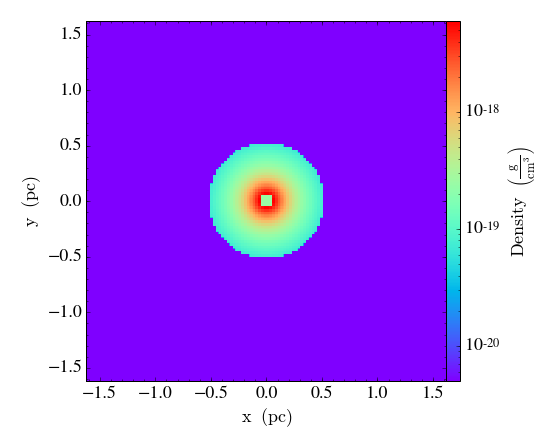


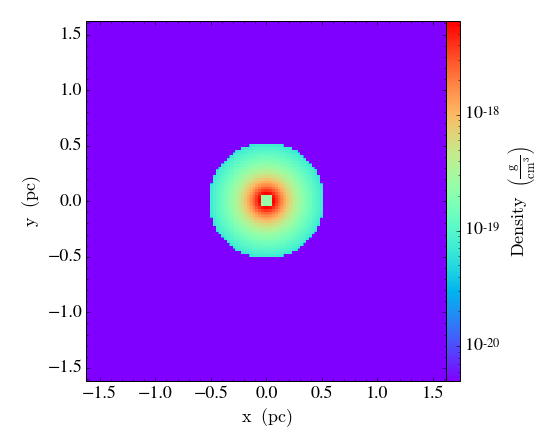


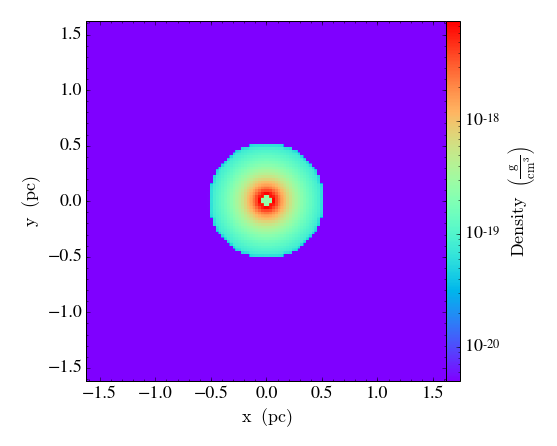


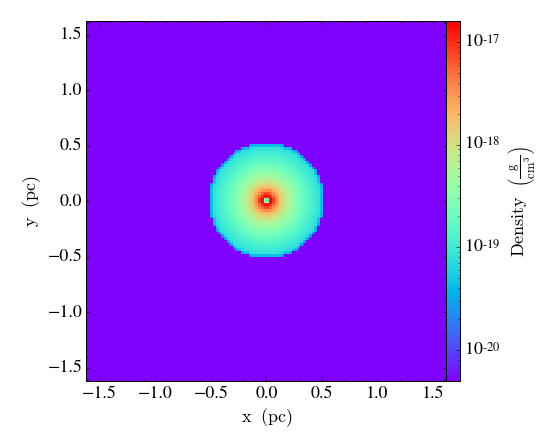


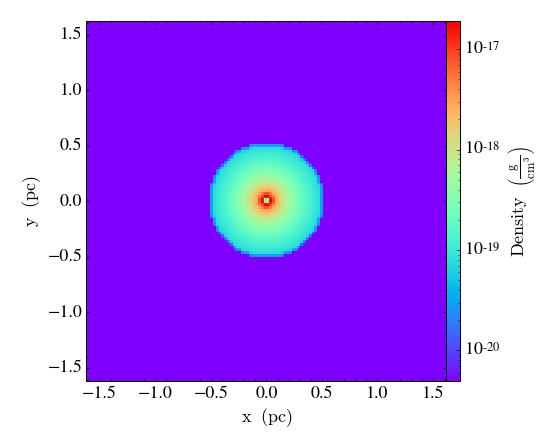


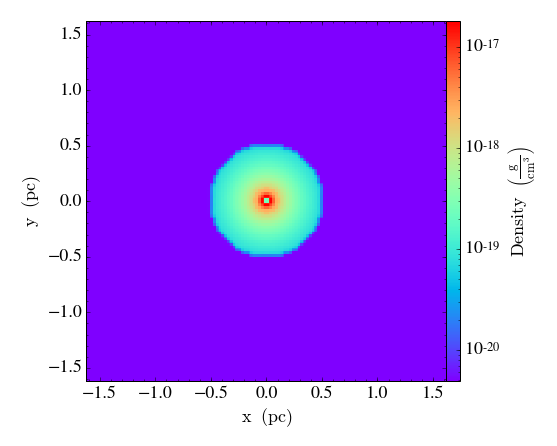


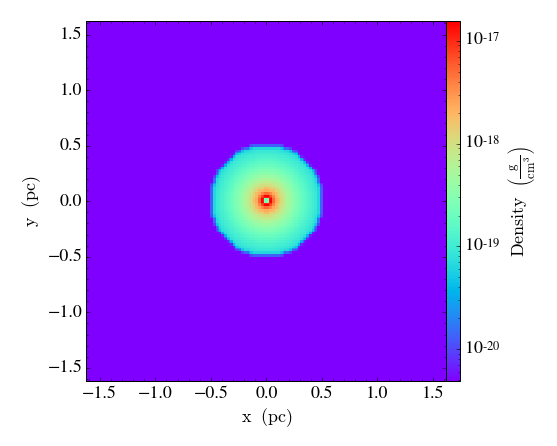

In [6]:
for i in np.arange(9):
    plot_dens(i)

There seems to be 8 sink particles formed in the scond timestep this is probably because the density threshold is too low, if we make it really huge then nothing will be formed based on the density threshold mechanism 

Good so now we get the warning "  WARNING: globalNumParticles = 0!!!", since we are not putting any particles in there 


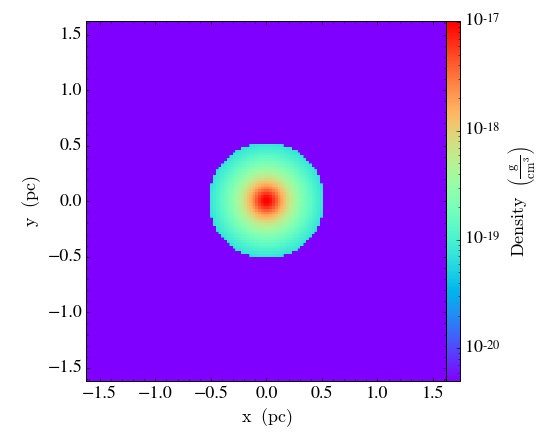


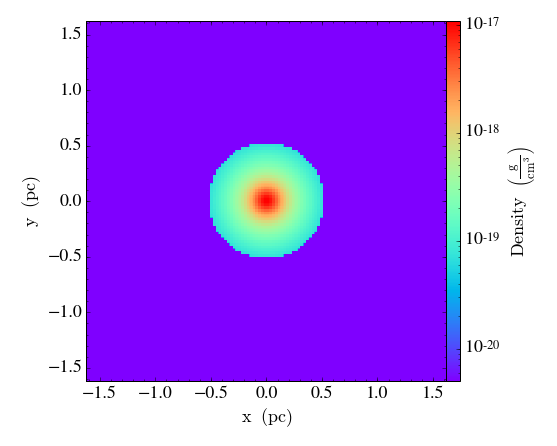


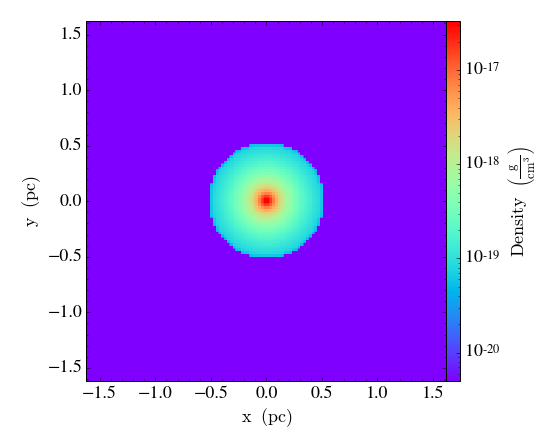


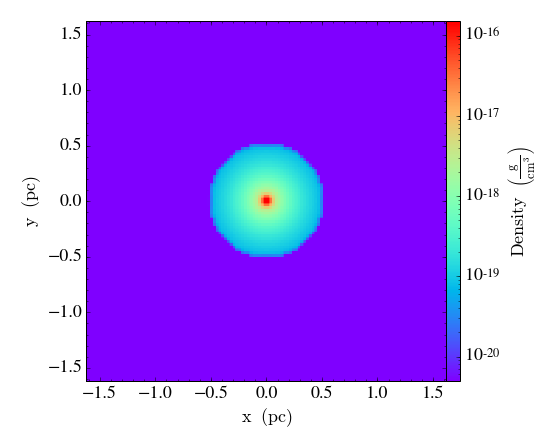


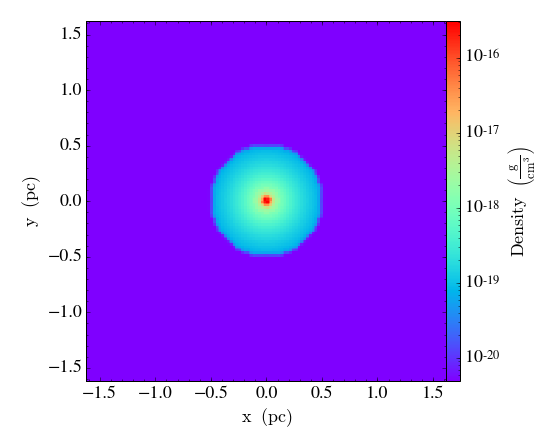


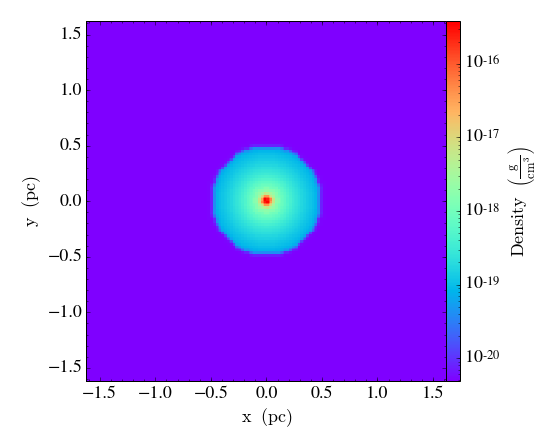


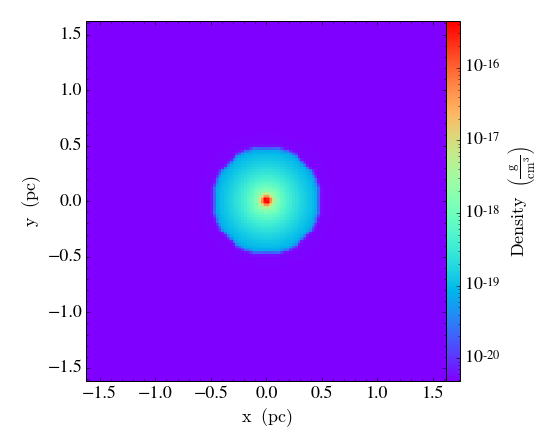


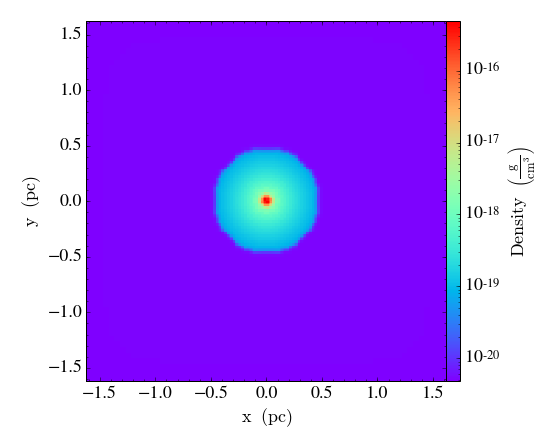


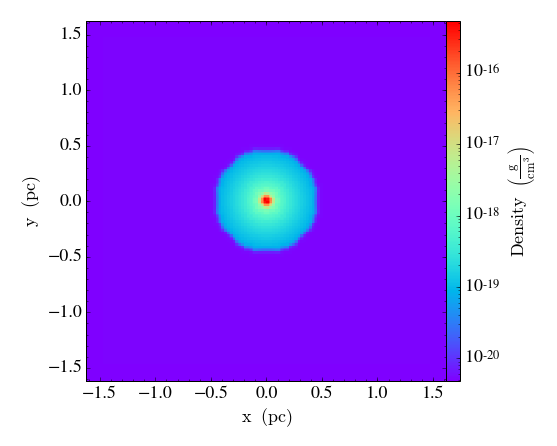

In [9]:
FINAL_STEP = 18
for i in np.arange(FINAL_STEP):
    if i%2==0 or i==FINAL_STEP:
        plot_dens(i)

I am going to restrict the output time and the timestepping dtmax to be no more than 1.0E10 since this is going fairly fast and we might be stepping too large in the final steps 


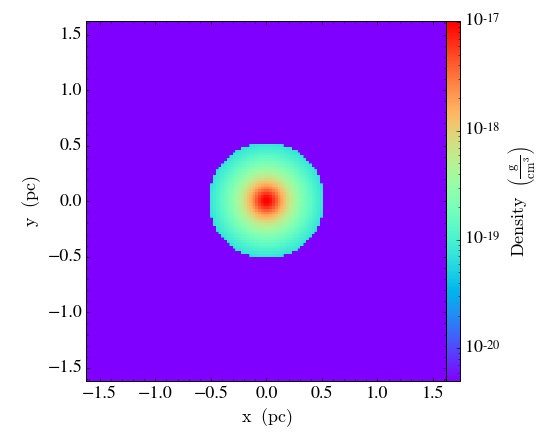


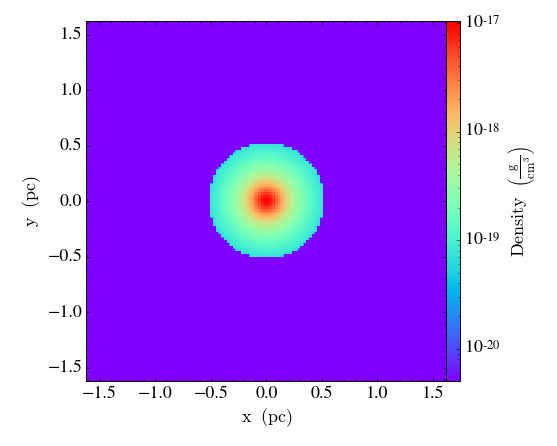


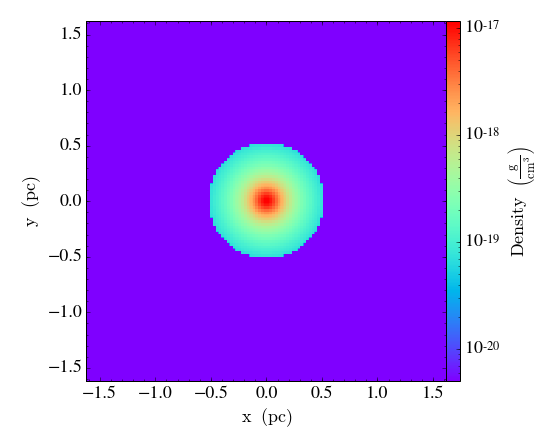


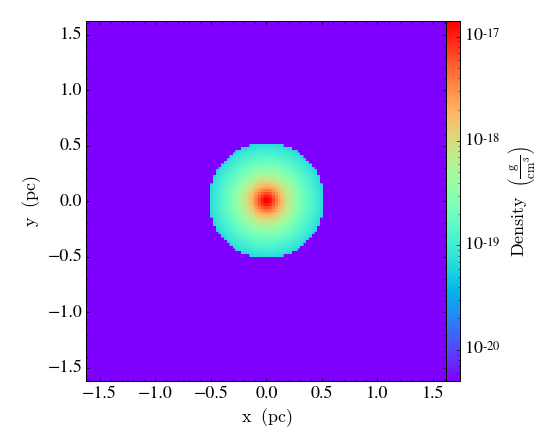


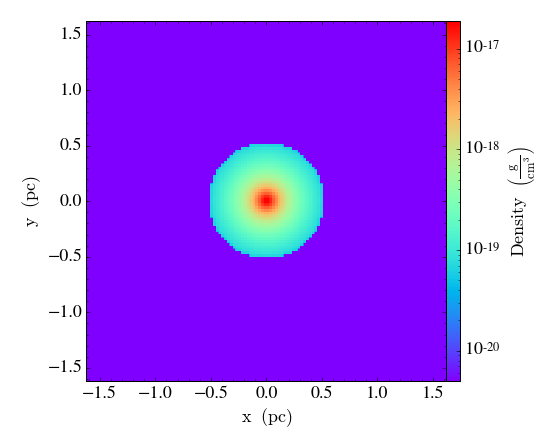


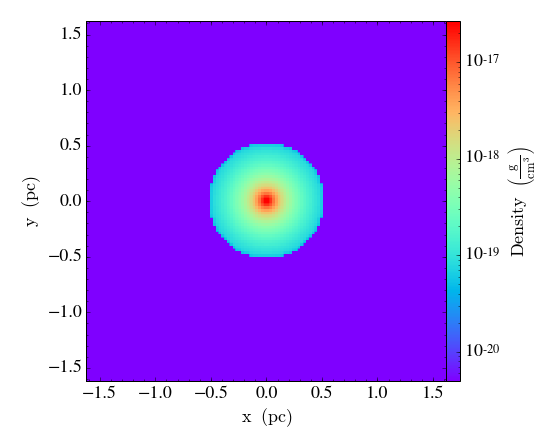


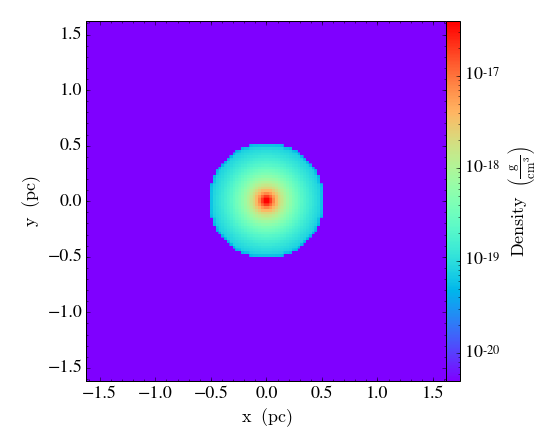


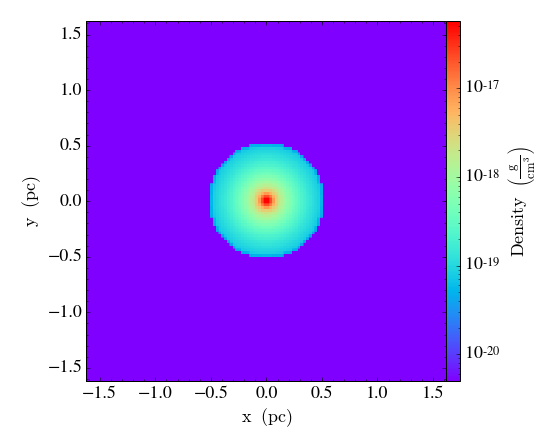


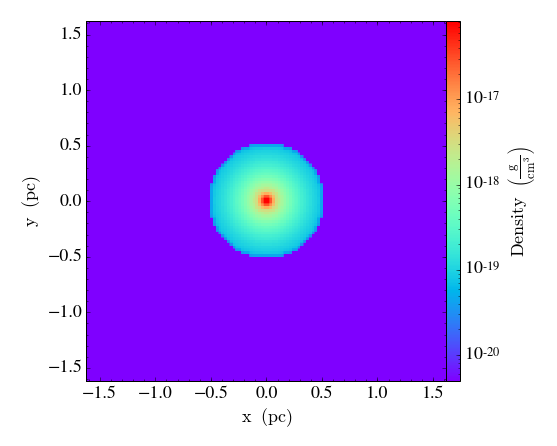


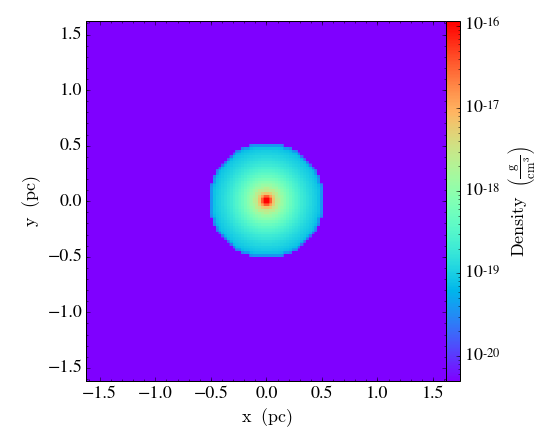


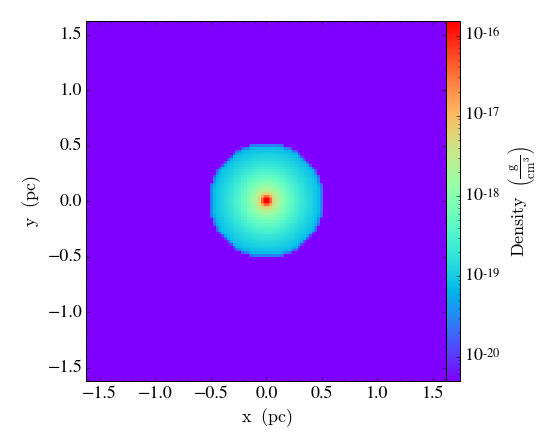


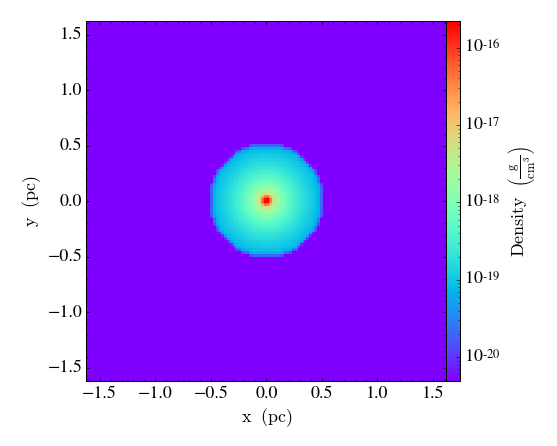

In [10]:
FINAL_STEP = 57
for i in np.arange(FINAL_STEP):
    if i%5==0 or i==FINAL_STEP:
        plot_dens(i)

this gave me more outputs as expected.  The core formation time t = 9.60E+11 s happened somewhere in between timestep 48 and 49

So I restarted at timestep 48, which should put in a sink for me 

vim 2023792.out

I am able to sucessfully put in the sink particle at restart, but after a few steps the code crashes because rieman noncovergence 

But no mass is accreting on? 

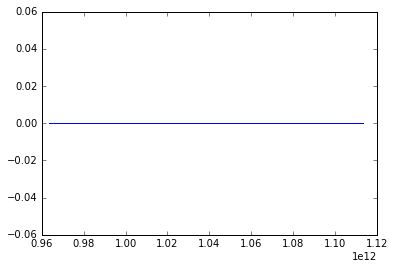

In [15]:
data =np.loadtxt("sinks_evol.dat",skiprows=1)
t = data[:,1]
mdot = data[:,15]
plt.plot(t,mdot)

In [16]:
mdot

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [17]:
cat sinks_evol.dat

     [00]part_tag         [01]time         [02]posx         [03]posy         [04]posz         [05]velx         [06]vely         [07]velz       [08]accelx       [09]accely       [10]accelz        [11]anglx        [12]angly        [13]anglz         [14]mass         [15]mdot        [16]ptime
            65536  9.635544300E+11  5.000000000E+18  5.000000000E+18  5.000000000E+18  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  1.989000000E+32  0.000000000E+00  0.000000000E+00
            65536  9.735544300E+11  5.000000000E+18  5.000000000E+18  5.000000000E+18 -4.349386178E-07 -1.807335375E-07 -5.453356933E-08 -4.349386178E-17 -1.807335375E-17 -5.453356933E-18  0.000000000E+00  0.000000000E+00  0.000000000E+00  1.989000000E+32  0.000000000E+00  0.000000000E+00
            65536  9.835544300E+11  5.000000000E+18  5.000000000E+18  5.000000000E+18 -1.092950105E-06 -2.573587849E-07 -1.5289950


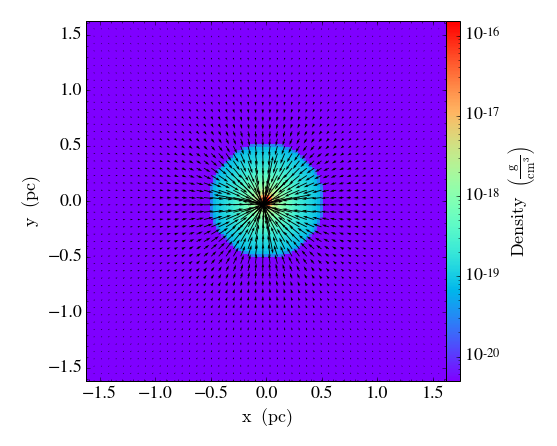


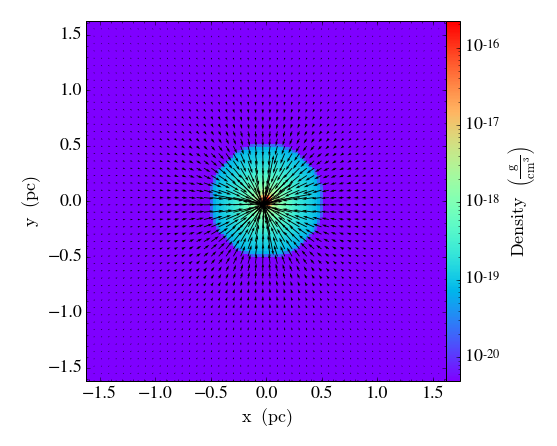

In [20]:
for i in np.arange(48,57):
    if i%5==0 or i==FINAL_STEP:
        plot_dens(i,velocity=True)

okay things are falling in, but nothing is accreting on. 

## Additional Sink Questions : 

- What is the appropriate value to set for the initial mass of a sink (i.e. particles_local(MASS_PART_PROP, 1) ) ?